# Hi Welcome to my Notebook! my name is **Rohan** and this is my submission for FalconX's Quant Analyst Internship Assignment.





In [138]:
#Importing required packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [139]:
#Reading data. The database consists 6000 rows spanning trades made between 23rd and 21st June 2021
df = pd.read_json('dataset.json')
print(df)

        amount0In  ...           timestamp
0     6111.000000  ... 2021-06-23 12:06:53
1        0.000000  ... 2021-06-23 12:06:42
2     5000.000000  ... 2021-06-23 12:05:47
3        0.000000  ... 2021-06-23 12:01:44
4        0.000000  ... 2021-06-23 11:57:18
...           ...  ...                 ...
5995     0.000000  ... 2021-06-20 18:17:32
5996     0.000000  ... 2021-06-20 18:15:45
5997   264.101661  ... 2021-06-20 18:15:45
5998  1000.000000  ... 2021-06-20 18:13:02
5999    90.000000  ... 2021-06-20 18:10:04

[6000 rows x 7 columns]


I have maputated the dataframe to provide the following data: Timestamp, Side (Buy or Sell), Base currency quantity traded, Quote currency quantity traded, Volume in USD and ID.

In [140]:
# adding a new column to store the Side i.e: Buy or Sell
arr=["Sell"]*6000
df.insert(6,'Side',arr,False)
df['Side'] = np.where((df.amount0In == 0),'Buy',df.Side)

#Using amountIn and amountOut, calculating the Base currency quantity traded, Quote currency quantity traded
df.columns = df.columns.str.replace('amountUSD', 'Volume_in_USD')
df.columns = df.columns.str.replace('amount0In', 'Base_currency_quantity')
df.columns = df.columns.str.replace('amount1Out', 'Quote_currency_quantity')
for index, row in df.iterrows():
    if(row['Base_currency_quantity']==0 ):
      df.at[index, 'Base_currency_quantity'] = row['amount1In']

for index, row in df.iterrows():
    if(row['Quote_currency_quantity']==0 ):
      df.at[index, 'Quote_currency_quantity'] = row['amount0Out']

#Dropping amount1In and amount0Out as there are no longer requireed
df.drop('amount1In',axis='columns', inplace=True)   
df.drop('amount0Out',axis='columns', inplace=True)
df = df[['timestamp','Side','Base_currency_quantity','Quote_currency_quantity','Volume_in_USD','id']] 
print(df.head())

#uncomment the below line to print the entire dataFrame
#print(df)

            timestamp  ...                                                 id
0 2021-06-23 12:06:53  ...  0x7d500bab7192961779f3b3b54294a110bc4fc2fe614c...
1 2021-06-23 12:06:42  ...  0xb9d83589579b5d1fedac1ae042a8e0df4e90a3444681...
2 2021-06-23 12:05:47  ...  0x065a036bd39ad3e9928d4f4be77685cbaf0c6aab1f1f...
3 2021-06-23 12:01:44  ...  0x2777a4c47c89d883360ee58fb1ae21a139d5594a0edb...
4 2021-06-23 11:57:18  ...  0xf2f3fca7911ca978d574f0f372ce79138b91f6b17fea...

[5 rows x 6 columns]


# Based of the dataset created, I have created a few charts with the aim in visualizing the data.



**Insight 1**

Over the past 3 days the ratio of UNI bought and sold is almost proportionate with UNI being bought in 54% or trades and swapped for wrapped ether(WETH) 46% of the time. 

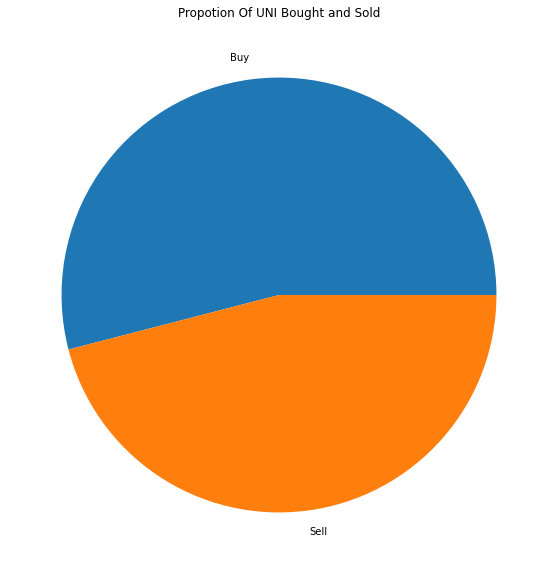

In [141]:
count_buy=0
count_sell=0
for index, row in df.iterrows():
  if(row['Side']== 'Buy'):
     count_buy+=1
  else:
      count_sell+=1
#print(count_buy)
#print(count_sell)

y = np.array([count_buy,count_sell])
mylabels = ["Buy", "Sell"]
plt.rcParams['figure.figsize'] = [10, 10]
plt.title("Propotion Of UNI Bought and Sold")
plt.pie(y, labels = mylabels)
plt.show() 

In [153]:
#rounding of the time to the nearest hour
df['hour'] = df['timestamp'].dt.round('H')
print(df.head(100))

             timestamp  ...                hour
0  2021-06-23 12:06:53  ... 2021-06-23 12:00:00
1  2021-06-23 12:06:42  ... 2021-06-23 12:00:00
2  2021-06-23 12:05:47  ... 2021-06-23 12:00:00
3  2021-06-23 12:01:44  ... 2021-06-23 12:00:00
4  2021-06-23 11:57:18  ... 2021-06-23 12:00:00
..                 ...  ...                 ...
95 2021-06-23 10:33:05  ... 2021-06-23 11:00:00
96 2021-06-23 10:32:42  ... 2021-06-23 11:00:00
97 2021-06-23 10:32:28  ... 2021-06-23 11:00:00
98 2021-06-23 10:31:34  ... 2021-06-23 11:00:00
99 2021-06-23 10:29:48  ... 2021-06-23 10:00:00

[100 rows x 7 columns]


**Insight 2 **

Over the past 2 days the amount being traded (in USD) seems to maximize at approximately 1200 hours GMT (or 5:30 pm indian standard time) and tapes-off after that.

Text(0, 0.5, 'amount(USD)')

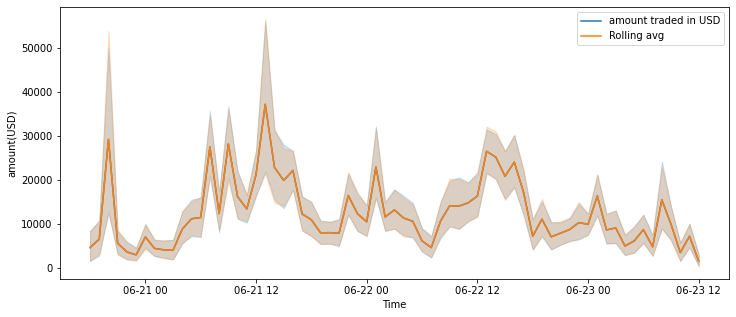

In [154]:
# set figure size
plt.figure( figsize = ( 12, 5))
import seaborn as sns  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'hour' ,
             y =  'Volume_in_USD',
             data = df,
             label = 'amount traded in USD')
  
# plot using rolling average
sns.lineplot( x = 'hour' ,
             y = 'Volume_in_USD',
             data = df,
             label = 'Rolling avg')
  
plt.xlabel('Time')
  

  
plt.ylabel('amount(USD)')

**Insight 3 **

While the ratio of buying and selling is constant for the entire dataset, if we look at trades above 65000 USD this trend seems to break with most people opting to sell (61%)


[103 155]


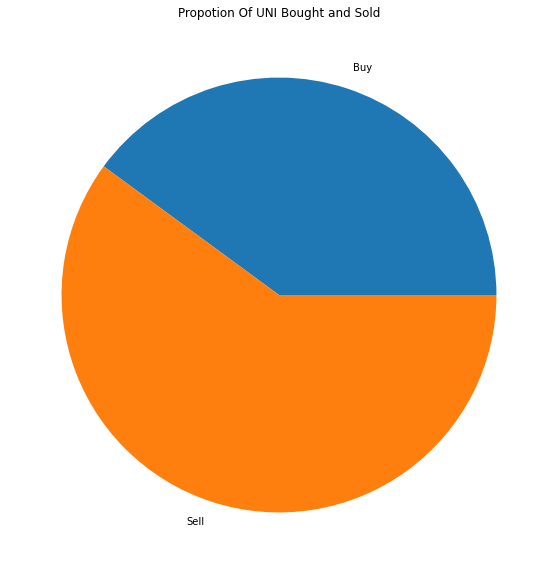

In [176]:
count_sell=0
count_buy=0
for index, row in df.iterrows():
  if(row['Volume_in_USD']>65000): 
    if(row['Side']=='Sell'):
      count_sell+=1
    
    else:
      count_buy+=1

y = np.array([count_buy,count_sell])
print(y)
mylabels = ["Buy", "Sell"]
plt.rcParams['figure.figsize'] = [10, 10]
plt.title("Propotion Of UNI Bought and Sold")
plt.pie(y, labels = mylabels)
plt.show() 